#questions to answer

Sleep factors vs sleep scores. several subsets. what are predictors of sleep scores. what affects sleep. MVA Analysis
Trends over time (Activity, Bowel Movements, Lifestyle, Gym, Practice). Design a viewr
Automate workflow. Update through API to webpage, display.

In [38]:
#import data.
import pandas as pd
import numpy as np
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import statsmodels

df=pd.read_csv("result.csv")

list(df.columns)
active=[i for i in df.columns if "Active_" in i]
bowel=[i for i in df.columns if"Bowel Movements_" in i]
creative=[i for i in df.columns if "Creative_" in i]
lifestyle=[i for i in df.columns if "Lifestyle_" in i]
meds=[i for i in df.columns if "Meds/Supplements_" in i]
energy=[i for i in df.columns if "Energy_" in i]
mood=[i for i in df.columns if "Mood_" in i]
nutrition=[i for i in df.columns if "Nutrition_" in i]
sleep=[i for i in df.columns if "Sleep_" in i]
symptom=[i for i in df.columns if "Symptom_" in i]
weather=[i for i in df.columns if "Weather_" in i]
sleep_metrics=['score','deep_sleep','efficiency_x','latency','rem_sleep','restfulness','timing','total_sleep']  #what is efficiency y?
hrv=['average_breath','average_heart_rate','average_hrv','lowest_heart_rate']
sleep_times=['awake_time','deep_sleep_duration','latency_duration','light_sleep_duration','rem_sleep_duration','restless_periods','time_in_bed','total_sleep_duration']
readiness=[i for i in df.columns if "readiness_" in i]



In [40]:

df["date"] = pd.to_datetime(df["date"])  # Ensure date format

# List of available metrics (excluding 'date' column)

# Generate minor tick marks (weekly intervals)
weekly_ticks = df["date"].dt.to_period("W").unique().to_timestamp().tolist()

app = Dash(__name__)

app.layout = html.Div([
    html.H4("Metric over Time", style={"color": "white", "textAlign": "center"}),
    dcc.Graph(id="graph"),
    
    # Styled Checklist
    dcc.Checklist(
        id="checklist",
        options=[{"label": metric, "value": metric} for metric in sleep_metrics],
        value=["score"],  
        inline=True,
        style={"color": "white"}  
    ),
], style={"backgroundColor": "black", "padding": "20px"})  

@app.callback(
    Output("graph", "figure"), 
    Input("checklist", "value"))
def update_line_chart(columns):
    fig = go.Figure()

    if not columns:
        return go.Figure()  

    for col in columns:
        fig.add_trace(go.Scatter(x=df["date"], y=df[col], mode="lines+markers", name=col))

    fig.update_layout(
        title="Metrics Over Time",
        xaxis_title="Date",
        yaxis_title="Value",
        legend_title="Metrics",
        
        # X-Axis Customization
        xaxis=dict(
            tickformat="%Y-%m-%d",  
            tickvals=weekly_ticks,  # ✅ Manually add minor ticks every week
            tickangle=45,  # Improve readability
            showgrid=True,  # Keep grid visible
        ),
        
        plot_bgcolor="black",  
        paper_bgcolor="black",  
        font=dict(color="white")  
    )

    return fig

if __name__ == "__main__":
    app.run_server(debug=True)


In [34]:

def create_lagged_features(df, features, lags=2):
    """
    Generate lagged features for specified columns in a dataframe.
    
    Parameters:
        df (pd.DataFrame): Input dataframe with a 'date' column and features.
        features (list): List of column names to generate lagged values for.
        lags (int): Number of lagged features to create.
    
    Returns:
        pd.DataFrame: Dataframe with new lagged feature columns.
    """
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])  # Ensure date column is in datetime format
    df = df.sort_values('date')  # Sort by date

    for feature in features:
        for lag in range(1, lags + 1):
            df[f"{feature}_lag{lag}"] = df[feature].shift(lag)

    return df.dropna().reset_index(drop=True)  # Drop NaN values from shifting

lagged_df = create_lagged_features(df, features=sleep_metrics, lags=3)
lagged_df

,date,Active_Activity level,Active_Basketball,Active_Bike (commute),Active_Climbing,Active_Cycling,Active_Pushups and Squats,Active_Running,Active_Table Tennis,Active_Walk,...,rem_sleep_lag3,restfulness_lag1,restfulness_lag2,restfulness_lag3,timing_lag1,timing_lag2,timing_lag3,total_sleep_lag1,total_sleep_lag2,total_sleep_lag3
0,2024-07-09,1,0,0,0,0,0,0,0,0,...,99.0,55.0,59.0,53.0,83.0,43.0,66.0,56.0,88.0,96.0
1,2024-07-10,2,0,0,0,0,0,0,0,0,...,96.0,54.0,55.0,59.0,77.0,83.0,43.0,72.0,56.0,88.0
2,2024-07-12,2,0,0,0,0,0,0,0,0,...,73.0,58.0,54.0,55.0,61.0,77.0,83.0,64.0,72.0,56.0
3,2024-07-14,2,0,0,0,0,0,0,0,0,...,95.0,60.0,58.0,54.0,52.0,61.0,77.0,68.0,64.0,72.0
4,2024-07-15,1,0,0,0,0,0,0,0,0,...,67.0,49.0,60.0,58.0,61.0,52.0,61.0,91.0,68.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2025-01-20,2,0,0,1,0,0,0,0,1,...,61.0,68.0,61.0,81.0,58.0,41.0,100.0,80.0,91.0,59.0
154,2025-01-21,1,0,1,0,0,0,0,0,0,...,100.0,56.0,68.0,61.0,40.0,58.0,41.0,95.0,80.0,91.0
155,2025-01-22,2,0,1,0,0,0,0,0,1,...,96.0,74.0,56.0,68.0,76.0,40.0,58.0,56.0,95.0,80.0
156,2025-01-23,2,0,1,0,0,0,0,0,1,...,98.0,64.0,74.0,56.0,68.0,76.0,40.0,70.0,56.0,95.0


In [41]:
sleep_metrics

['score',
 'deep_sleep',
 'efficiency_x',
 'latency',
 'rem_sleep',
 'restfulness',
 'timing',
 'total_sleep']

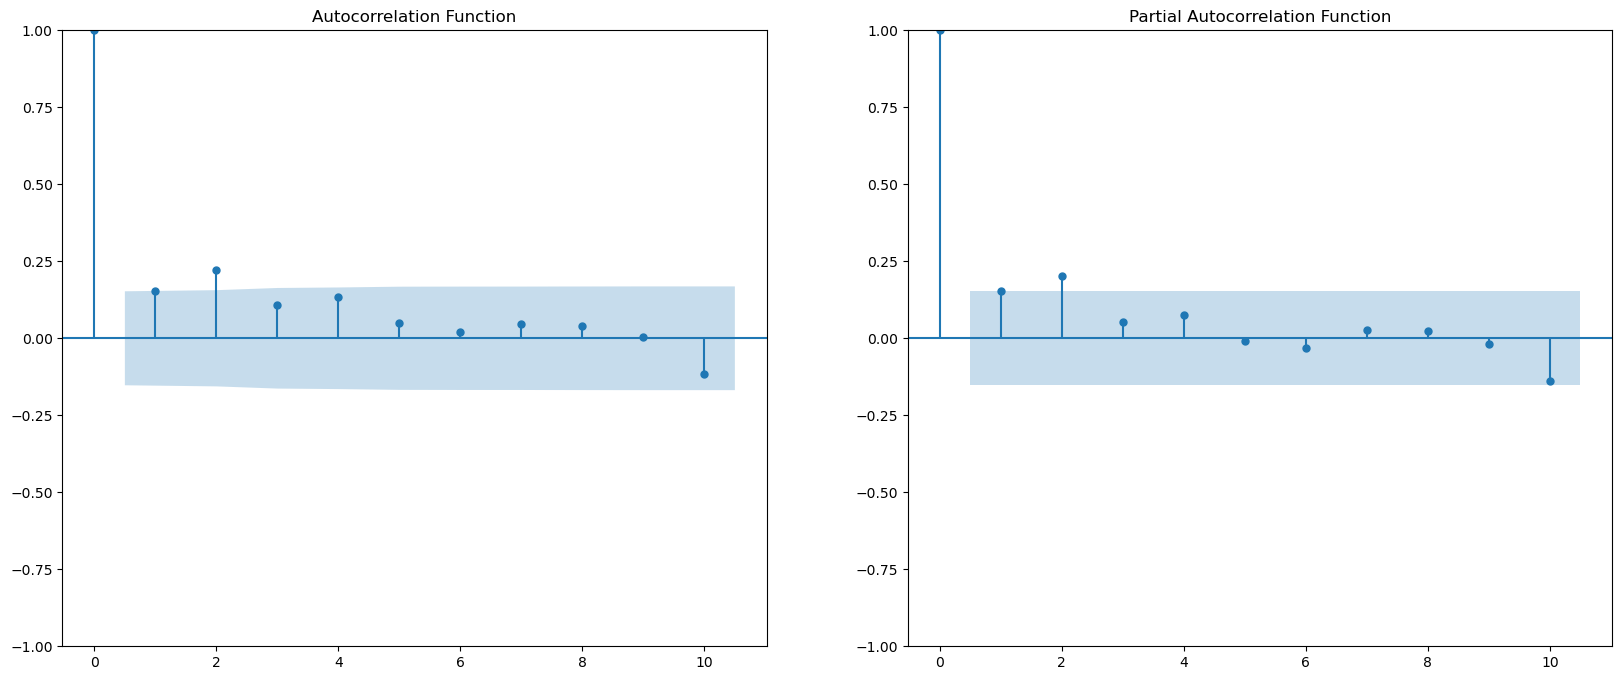

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

metric = 'score'

# Ensure the series is valid (no NaN and properly formatted)
df[metric] = df[metric].astype(float)  # Ensure numeric
series = df[metric].dropna()

# Compute ACF and PACF values
acf_values = acf(series, nlags=10)
pacf_values = pacf(series, nlags=10)

# Plot using plot_acf and plot_pacf (corrected)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

plot_acf(series, lags=10, ax=ax[0])  # Pass raw series, not acf_values
ax[0].set_title("Autocorrelation Function")

plot_pacf(series, lags=10, ax=ax[1])  # Pass raw series, not pacf_values
ax[1].set_title("Partial Autocorrelation Function")

plt.show()